In [11]:
import pandas as pd

k_data = pd.read_csv(r"C:\Users\전대혁\TEST_Lab\machine-learning-master\data\csv\Fish.csv")
k_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
# Species의 데이터를 가져온 후 Parkki의 Weight, Length3를 P_w의 데이터 인덱싱
p_w = list(k_data.loc[k_data['Species'] == 'Parkki']['Weight'])
# 
p_l = list(k_data.loc[k_data['Species'] == 'Parkki']['Length3'])

s_w = list(k_data.loc[k_data['Species'] == 'Smelt']['Weight'])
s_l = list(k_data.loc[k_data['Species'] == 'Smelt']['Length3'])

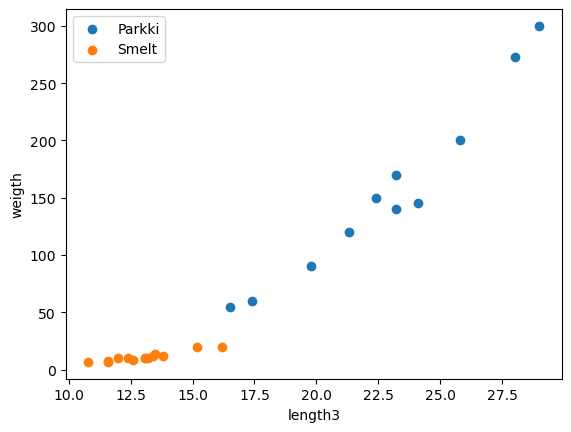

In [5]:
import matplotlib.pyplot as plt

plt.scatter(p_l, p_w, label='Parkki')
plt.scatter(s_l, s_w, label='Smelt')
plt.xlabel('length3')
plt.ylabel('weigth')
plt.legend()
plt.show()

In [6]:
import numpy as np

f_l = p_l + s_l
f_w = p_w + s_w

f_data = np.column_stack((f_l, f_w))

In [7]:
f_t = np.concatenate((np.ones(len(p_w)), np.zeros(len(s_w))))

In [8]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    f_data, f_t, stratify=f_t
)

In [9]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

train_scaled = (train_input - mean) / std

In [10]:
outline = []
for i, sample in enumerate(train_scaled):
    for n in sample:
        if abs(n) >= 2:
            outline.append(i)
            break
print(train_scaled[outline])

[[1.99798493 2.31016966]
 [1.82524848 2.02678481]]


In [27]:
train_input = np.delete(train_input, outline, axis=0)
train_target = np.delete(train_target, outline, axis=0)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.8571428571428571

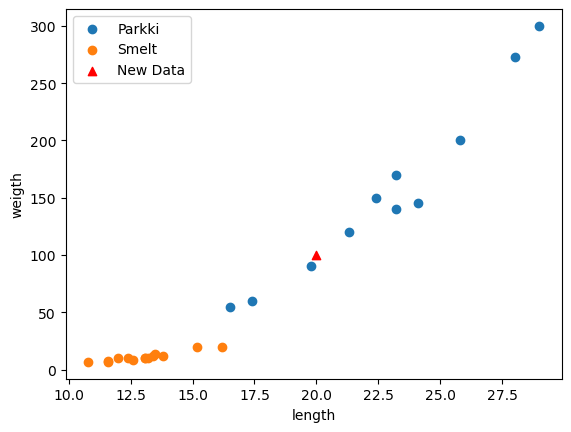

In [33]:
plt.scatter(p_l, p_w, label='Parkki')
plt.scatter(s_l, s_w, label='Smelt')
plt.scatter(20, 100, marker='^', color='red', label='New Data')
plt.xlabel('length')
plt.ylabel('weigth')
plt.legend()
plt.show()

In [37]:
predict = kn.predict([[20, 100]])
print(predict)

[1.]
